<a href="https://www.kaggle.com/abhimanyunag/apple-share-price?scriptVersionId=90389448" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/yahoo-finance-apple-inc-aapl/AAPL_daily_update.csv
/kaggle/input/yahoo-finance-apple-inc-aapl/AAPL_Montly_updates.csv
/kaggle/input/yahoo-finance-apple-inc-aapl/AAPL_weekly_update.csv


In [2]:
data = pd.read_csv('/kaggle/input/yahoo-finance-apple-inc-aapl/AAPL_daily_update.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-09-10,53.465000,54.195000,52.927502,54.174999,53.642761,127111600
1,2019-09-11,54.517502,55.927502,54.432499,55.897499,55.348343,177158400
2,2019-09-12,56.200001,56.605000,55.715000,55.772499,55.224567,128906800
3,2019-09-13,55.000000,55.197498,54.255001,54.687500,54.150230,159053200
4,2019-09-16,54.432499,55.032501,54.389999,54.974998,54.434902,84632400


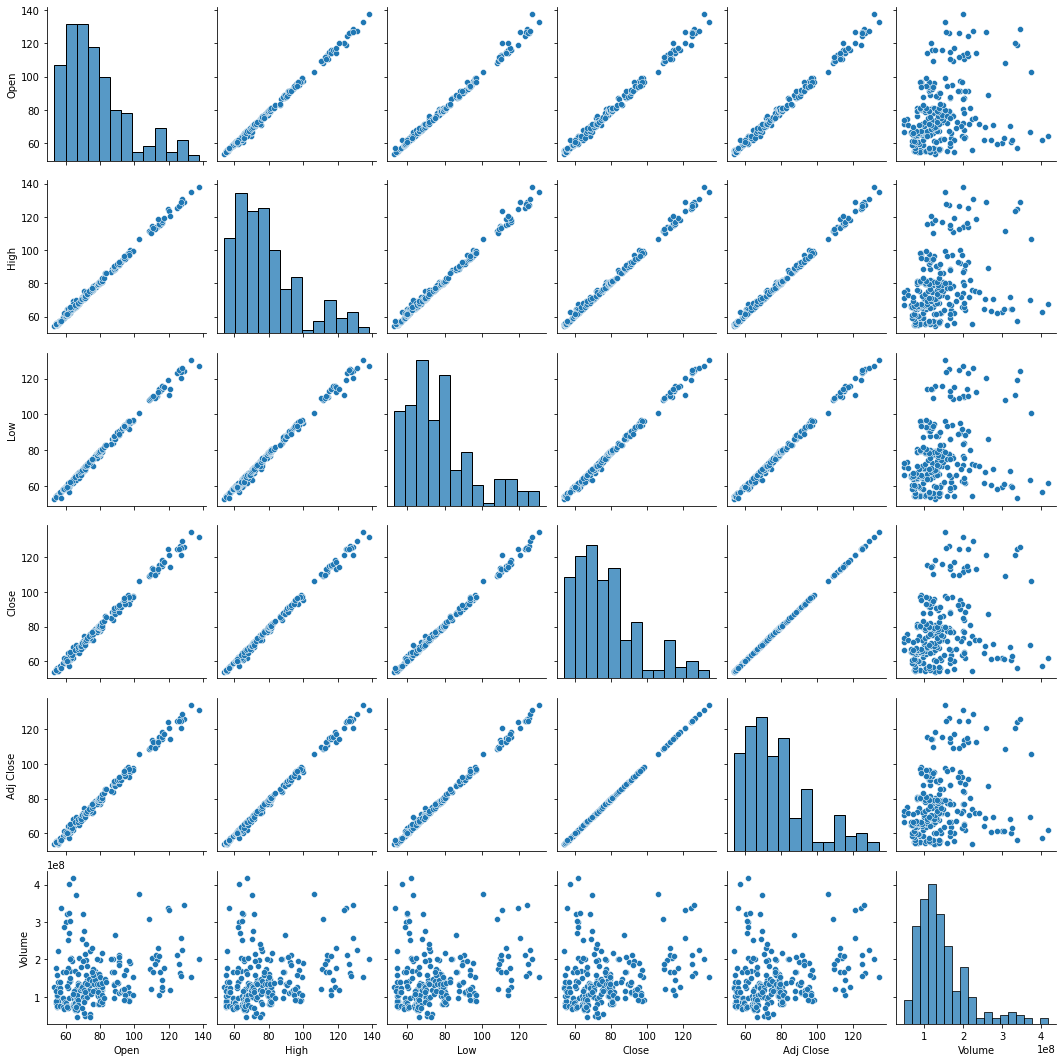

In [3]:
import seaborn as sns

sns.pairplot(data)

In [4]:
# pearson correlation coefficient
data.corr('pearson')['Close']

Open         0.996692
High         0.997953
Low          0.998039
Close        1.000000
Adj Close    0.999980
Volume       0.229325
Name: Close, dtype: float64

In [5]:
# since open, high and low are all closely correlated to close, 
# we shall use them to predict the close prices
from sklearn.model_selection import train_test_split
from sklearn.linear_model import *
from sklearn.metrics import r2_score

In [6]:
input_data = data[['Open','Low','High']]
target_data = data['Close']

In [7]:
x_train, x_test, y_train, y_test = train_test_split(input_data, target_data, test_size=0.8, random_state=1)

In [8]:
rid = Ridge()
a = rid.fit(x_train,y_train)
a.coef_

array([-0.48159857,  0.83230569,  0.6439642 ])

In [9]:
x_test_pred_rd = rid.predict(x_test)
r2_score(y_test, x_test_pred_rd)
# R^2 of 0.99 --> very nice correlation

0.9979374517084914